In [22]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [24]:
cd '/content/gdrive/My Drive/Real_time_HW3'

/content/gdrive/My Drive/Real_time_HW3


In [25]:
import torch
import torchvision
import torchvision.datasets as datasets
from torch import nn

In [26]:
import collections
import math
import os
import shutil
import pandas as pd
import torch
import torchvision
from torch import nn


In [27]:
pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install --upgrade d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:

pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from d2l import torch as d2l

In [31]:
import torchvision.transforms as transforms

In [32]:
data_dir = './data' 
transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor(),transforms.Resize(64)])
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True)
testset = torchvision.datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [33]:

print(len(trainset))
sample = next(iter(trainset))
print(len(sample))
image, label = sample
print(type(image))
print(type(label))
image.shape
print(len(testset))

50000
2
<class 'torch.Tensor'>
<class 'int'>
10000


cat


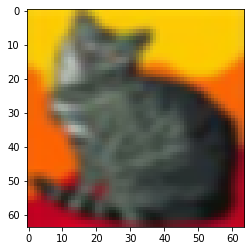

deer


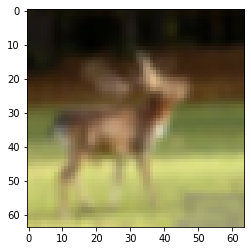

horse


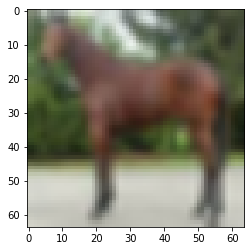

horse


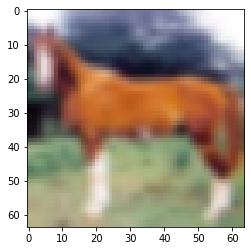

plane


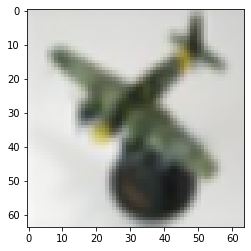

cat


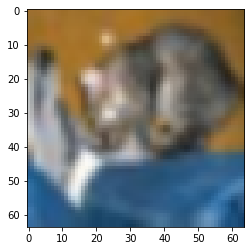

ship


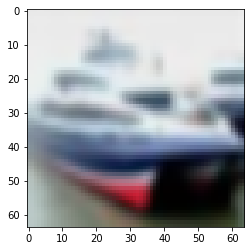

ship


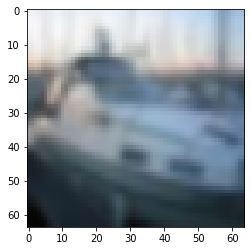

plane


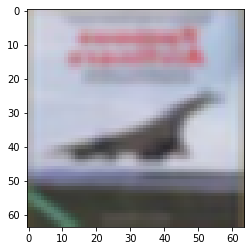

frog


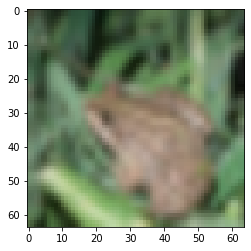

In [34]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

dataiter = iter(test_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

In [35]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.LazyBatchNorm2d())
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [36]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [37]:
#VGG16
model = VGG(arch=((2, 64), (2, 128),(3, 256), (3, 512), (3, 512)), lr=0.01)


In [38]:
import torch.optim as optim

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [40]:
device = 'cuda' 
model.to(device)

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

1,  2000| loss: 1.965
1,  4000| loss: 1.690
1,  6000| loss: 1.481
1,  8000| loss: 1.309
1, 10000| loss: 1.178
2,  2000| loss: 1.082
2,  4000| loss: 1.052
2,  6000| loss: 0.971
2,  8000| loss: 0.931
2, 10000| loss: 0.896
3,  2000| loss: 0.816
3,  4000| loss: 0.823
3,  6000| loss: 0.776
3,  8000| loss: 0.771
3, 10000| loss: 0.752
4,  2000| loss: 0.676
4,  4000| loss: 0.667
4,  6000| loss: 0.659
4,  8000| loss: 0.657
4, 10000| loss: 0.657
5,  2000| loss: 0.581
5,  4000| loss: 0.591
5,  6000| loss: 0.574
5,  8000| loss: 0.567
5, 10000| loss: 0.569
6,  2000| loss: 0.526
6,  4000| loss: 0.519
6,  6000| loss: 0.524
6,  8000| loss: 0.500
6, 10000| loss: 0.487
7,  2000| loss: 0.442
7,  4000| loss: 0.471
7,  6000| loss: 0.473
7,  8000| loss: 0.445
7, 10000| loss: 0.437
8,  2000| loss: 0.394
8,  4000| loss: 0.390
8,  6000| loss: 0.419
8,  8000| loss: 0.415
8, 10000| loss: 0.392
9,  2000| loss: 0.364
9,  4000| loss: 0.369
9,  6000| loss: 0.374
9,  8000| loss: 0.362
9, 10000| loss: 0.368
10,  2000|

Text(0.5, 1.0, 'Convergence of Loss')

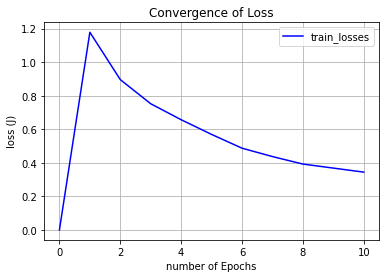

In [41]:
epoch_losses = [] 
model.train()
n_epochs=10
train_losses = np.zeros(n_epochs+1)
val_losses = np.zeros(n_epochs+1)
for epoch in range(n_epochs):
    
    running_loss = 0.0
    saved_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()
       


       
        running_loss += loss.item()
        train_losses[epoch+1]=running_loss/2000
        if i % 2000 == 1999:  
            print('%d, %5d| loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            saved_loss = running_loss
            running_loss = 0.0

    epoch_losses.append(saved_loss/10000)
    


plt.plot(train_losses, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.legend(['train_losses', 'val_losses'])
plt.grid()
plt.xlabel('number of Epochs')
plt.ylabel('loss (J)')
plt.title('Convergence of Loss') 
   

In [42]:
total = 0
correct = 0
model.eval() 
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Model Accuracy: %d %%' % (100 * correct / total))

Model Accuracy: 84 %


In [43]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=34b7cbe7915a76af74983e69db37815d181a397ad0c86fe581c2dc6564794bcd
  Stored in directory: /root/.cache/pip/wheels/86/07/9f/879035d99d7b639bbc564d23fed862a679aee7d1a2dced8c2e
Successfully built ptflops


In [44]:
sum([param.nelement() for param in model.parameters()])

39938122

In [45]:
pip install --upgrade git+https://github.com/sovrasov/flops-counter.pytorch.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sovrasov/flops-counter.pytorch.git to /tmp/pip-req-build-tt_t73l6
  Running command git clone --filter=blob:none --quiet https://github.com/sovrasov/flops-counter.pytorch.git /tmp/pip-req-build-tt_t73l6
  Resolved https://github.com/sovrasov/flops-counter.pytorch.git to commit 64a8dbdfb8cd85d1d7bb1d3f7237b8eafec78005
  Preparing metadata (setup.py) ... done


In [46]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = model
  macs, params = get_model_complexity_info(net, (3, 64, 64), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

VGG(
  39.94 M, 100.000% Params, 1.28 GMac, 100.000% MACs, 
  (net): Sequential(
    39.94 M, 100.000% Params, 1.28 GMac, 100.000% MACs, 
    (0): Sequential(
      38.98 k, 0.098% Params, 160.43 MMac, 12.505% MACs, 
      (0): Conv2d(1.79 k, 0.004% Params, 7.34 MMac, 0.572% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, 0.000% Params, 524.29 KMac, 0.041% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(0, 0.000% Params, 262.14 KMac, 0.020% MACs, )
      (3): Conv2d(36.93 k, 0.092% Params, 151.26 MMac, 11.790% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, 0.000% Params, 524.29 KMac, 0.041% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(0, 0.000% Params, 262.14 KMac, 0.020% MACs, )
      (6): MaxPool2d(0, 0.000% Params, 262.14 KMac, 0.020% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    